# PyTorch Tutorial, DataLoaders:
#### DataLoaders get Datasets and convert them into iterables
- Download the **iris** dataset, then apply **TensorDataset**
    - See previous post for more details on this step
- Apply **DataLoader** over the tensor Dataset, to make dataset iterable.
    - Using DataLoader with iter() and next() methods
    - Using DataLoader in a for-loop
- Download the **MNIST hand-written digit** dataset and apply DataLoader to it.
    - Then, get and display a minibatch of the MNIST dataset using iter() and next() methods.

https://github.com/ostad-ai/PyTorch-Tutorial

In [1]:
# importing the necessary modules
import torch
from torchvision import datasets,transforms
from torch.utils.data import TensorDataset,DataLoader
from matplotlib import pyplot as plt
from urllib import request

Read the following Jupyter Notebook for more info on the iris dataset: <br>
https://raw.githubusercontent.com/ostad-ai/Machine-Learning/main/data%20visualization-Iris%20dataset%20with%20Blender%20API.ipynb
<br> Loading the **iris** dataset

In [2]:
file_url='https://raw.githubusercontent.com/ostad-ai/Machine-Learning/main/iris.csv'
with request.urlopen(file_url) as file:
    iris=file.read().decode('utf-8').splitlines()

Separating **features** and **labels** from the iris dataset in the form data pair (features,labels).
<br> Then, applying **TensorDataset** to get in the form of **Dataset** in PyTorch (see previous post in the repository for more details).
<br> The **iris** dataset has **four** features and **three** classes. The dataset has **150** samples.
<br>Reminder: The class **Dataset** in **PyTorch** holds the features and labels of samples of the given dataset in form of (x,y) pairs.

In [3]:
def iris_features_labels(dataset):
    header=[]; rows=[]
    for line in dataset:
        if line.strip():
            if not header: header=line.split(',')
            else: rows.append(line.split(','))   
    features=[]; labels=[]
    classes=list(set([row[4] for row in rows]))
    for row in rows:
        features.append([float(item) for item in row[:4]])
        labels.append(classes.index(row[4]))
    return features,labels,classes,header
features,labels,classes,header=iris_features_labels(iris)
# converting to tensors
features_tn,labels_tn=torch.tensor(features),torch.tensor(labels)
#converting to tensors
xy=TensorDataset(features_tn,labels_tn)

A complete pass over the entire dataset is called an **epoch**.
In each epoch, we feed our neural network (deep learning) with small groups of the dataset. We call such small groups of dataset **minibatches**. 
<br>After each minibatch, weights of our neural network are updated.
<br>To reduce **overfitting**, at the end of each epoch ,we should *reshuffle* the dataset.
<br> **DataLoader** gets the dataset and converts the dataset into an iterable. DataLoader is an iterator class which supports iter() and next() methods. By these methods, we can iterate over the dataset.

In [4]:
minibatch_size=7
xy_dataloader=DataLoader(xy,batch_size=minibatch_size,shuffle=True)
xy_iter=iter(xy_dataloader)
xs0,ys0=next(xy_iter)
print(f'Features in a minibatch of size {minibatch_size}:\n{xs0}')
print(f'Labels of the minibatch of size {minibatch_size}:\n{ys0}')

Features in a minibatch of size 7:
tensor([[6.1000, 2.8000, 4.7000, 1.2000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [5.6000, 2.9000, 3.6000, 1.3000]])
Labels of the minibatch of size 7:
tensor([1, 1, 2, 1, 2, 1, 1])


We can also iterate over DataLoader in a **for-loop**, as shown below. 
<br>In the example below, we just show three minibatches.
<br> Hint: The parameter batch_size of DataLoader is the size of a minibatch. 

In [5]:
minibatch_size=4
xy_dataloader2=DataLoader(xy,batch_size=minibatch_size,shuffle=True)
N2show=3; n2show=0
print(f'Each minibatch is composed of {minibatch_size} pairs (feature,label)')
print('Each feature has four components, and each label has one component')
#using Dataloader in a for-loop
for x,y in xy_dataloader2:
    print(f'minibatch: {n2show}')
    print(x,y)
    n2show+=1
    if n2show>=N2show:
        break

Each minibatch is composed of 4 pairs (feature,label)
Each feature has four components, and each label has one component
minibatch: 0
tensor([[4.9000, 2.5000, 4.5000, 1.7000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.0000, 2.2000, 4.0000, 1.0000]]) tensor([0, 1, 2, 1])
minibatch: 1
tensor([[7.0000, 3.2000, 4.7000, 1.4000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [7.7000, 3.8000, 6.7000, 2.2000]]) tensor([1, 2, 1, 0])
minibatch: 2
tensor([[5.2000, 2.7000, 3.9000, 1.4000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.7000, 4.4000, 1.5000, 0.4000]]) tensor([1, 2, 2, 2])


Let's download the **MNIST** dataset which contains handwritten digits in gray-level images, each of size 28*28

In [6]:
# here, we download the training set of MNIST
mnist=datasets.MNIST(root='./MNIST',train=True, download=True)

Display a sample of MNIST data pair: (image,label)

type: <class 'PIL.Image.Image'>, width:28 height:28


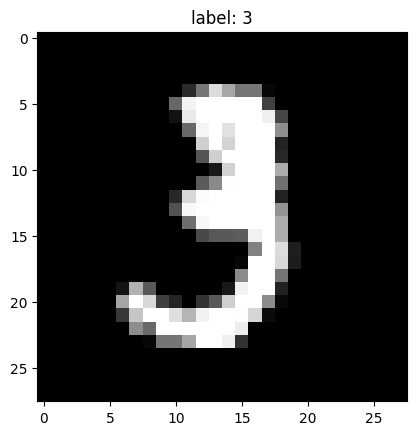

In [7]:
# the original images in MNIST are in the format PIL
mnist.transform=None
image,label=mnist[10]
print(f'type: {type(image)}, width:{image.width} height:{image.height}')
plt.imshow(image,cmap='gray')
plt.title(f'label: {label}')
plt.show()

Get a minibatch of MNIST dataset, after using ToTensor() to it, employing DataLoader, and showing the images with pyplot

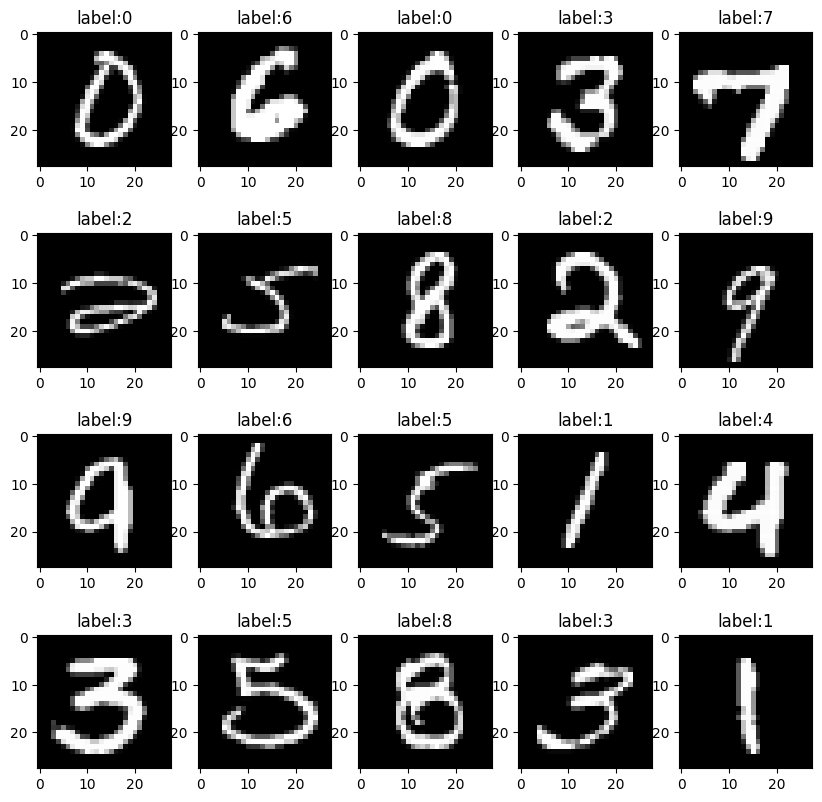

In [9]:
# images in mnist are converted to tensor as we iterate
mnist.transform=transforms.ToTensor()
mnist_bs=20 # size of each minibatch
mnist_dataloader=DataLoader(mnist,batch_size=mnist_bs,shuffle=True)
minibatch_0=next(iter(mnist_dataloader))
images,labels=minibatch_0
plt.figure(figsize=(10,10))
for i in range(mnist_bs):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].permute(1,2,0),cmap='gray')
    plt.title(f'label:{labels[i]}')
plt.show()